<a href="https://colab.research.google.com/github/hfarruda/deeplearningtutorial/blob/master/deepLearning_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Convolutional Neural Network (CNN)

This example is part of the [*Deep Learning Tutorial*](https://github.com/hfarruda/deeplearningtutorial), authored by Henrique F. de Arruda, Alexandre Benatti, César Comin, and Luciano da Fontoura Costa. This code is not suitable for other data and/or applications, which will require modifications in the structure and parameters. This code has absolutely no warranty.

If you publish a paper related on this material, please cite:

H. F. de Arruda, A. Benatti, C. H. Comin, L. da F. Costa, "Learning Deep Learning (CDT-15)," 2019.

This tutorial is the second example of deep learning implementation, in which we exemplify a classification task. More specifically, we considered ten classes of color pictures.

First of all, we import the necessary libraries. Here we opt for using Keras (using TensorFlow backend).

In [1]:
%matplotlib inline

In [2]:


import keras


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras import utils

#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

If you have a GPU, you can use the following code to allocate processing into it.  Otherwise, proceed to (*).

In [3]:
import tensorflow as tf
from keras import backend as K

number_of_cpu_cores = 8


(*) In this example, we used the CIFAR10, which is consists of a colored dataset of images. It is available in Keras library, available on [keras-datasets](https://keras.io/datasets/).
This dataset is organized into two parts, where the first is called x_train/x_test and comprises RGB images with dimensions of 32x32x3 . The second represents the targets, and the variables are called y_train/y_test, which are represented by arrays of category tags from 0 to 9.

The following command is used to load the data set.

In [4]:
(train_data, train_target), (test_data, test_target) = cifar10.load_data()

train_target_one_hot_encoding = utils.to_categorical(train_target)

In order to visualize a given figure, the following code can be executed.

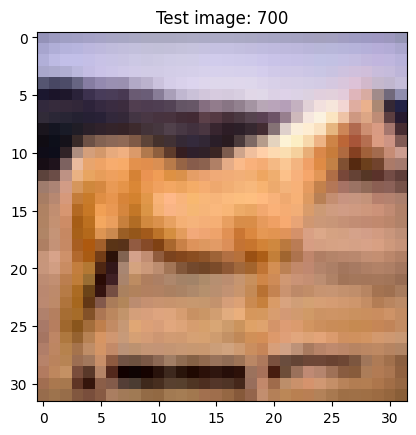

In [5]:
image_id = 700
plt.imshow(test_data[image_id])
plt.title("Test image: " + str(image_id))
plt.show()

In the following, we define the network topology. In this case, because of the redundancy typically found in images, we do not employ dropout in the convolutional layers.

In [6]:
input_shape = train_data.shape[1:]
filters = 128
kernel_size = (3,3)
pool_size = (2,2)

optimizer = 'adam'
loss = 'categorical_crossentropy'
metrics = ['categorical_accuracy']
activation = 'relu'
activation_function_output = 'softmax'
number_of_cnn_layers = 3
number_of_ff_layers = 3
number_of_units_output = train_target_one_hot_encoding.shape[1]

cnn_model = Sequential()
cnn_model.add(Conv2D(filters, kernel_size, input_shape = input_shape,
                     activation = activation))

cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size = pool_size))

for i in range(number_of_cnn_layers-1):
    cnn_model.add(Conv2D(filters, kernel_size, activation = activation))
    cnn_model.add(BatchNormalization())
    cnn_model.add(MaxPooling2D(pool_size = pool_size))

cnn_model.add(Flatten())

#Feedforward network
for i in range(number_of_ff_layers):
    cnn_model.add(Dense(units = 128, activation = activation))
    cnn_model.add(Dropout(0.3))

cnn_model.add(Dense(units = number_of_units_output,
                    activation = activation_function_output))

cnn_model.compile(optimizer = optimizer, loss = loss, metrics = metrics)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
print("input_shape ", input_shape)

input_shape  (32, 32, 3)


We can use the following command to see the network topology.


In [8]:
cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 13, 13, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 400,266 (1.53 MB)

 Trainable params: 399,498 (1.52 MB)

 Non-trainable params: 768 (3.00 KB)

The training step is executed as follows. Because this network demands a high computational power, we can use a small number of epochs.

In [9]:
batch_size = 30
epochs = 50

cnn_model.fit(train_data, train_target_one_hot_encoding,
              batch_size = batch_size, epochs = epochs)

Epoch 1/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - categorical_accuracy: 0.3158 - loss: 1.8740
Epoch 2/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 27s 5ms/step - categorical_accuracy: 0.5586 - loss: 1.2834
Epoch 3/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.6384 - loss: 1.0702
Epoch 4/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.6860 - loss: 0.9449
Epoch 5/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.7149 - loss: 0.8613
Epoch 6/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - categorical_accuracy: 0.7438 - loss: 0.7674
Epoch 7/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.7676 - loss: 0.7054
Epoch 8/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - categorical_accuracy: 0.7832 - loss: 0.6479
Epoch 9/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.7991 - loss: 0.6072
Epoch 10/50
1667/1667 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - categorical_accuracy: 0.8157 - loss: 0.5

Since there are more than two classes, we show the classification results through a confusion matrix.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Accuracy = 0.7628
Confusion matrix:


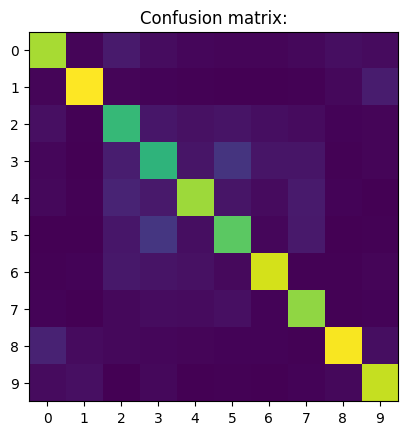

In [10]:
predictions = cnn_model.predict(test_data)
found_target = predictions.argmax(axis=1)

accuracy = accuracy_score(test_target, found_target)
print("Accuracy =", accuracy)

print("Confusion matrix:")
matrix = confusion_matrix(found_target,test_target)

plt.title("Confusion matrix:")
plt.xticks(np.linspace(0,9,10))
plt.yticks(np.linspace(0,9,10))
plt.imshow(matrix)
plt.show()

## License

This Deep Learning Tutorial is licensed under a Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 (CC BY-NC-ND 4.0) International License.

## Acknowledgments
Henrique F. de Arruda acknowledges FAPESP for sponsorship (grant no. 2018/10489-0). Alexandre Benatti thanks Coordenação de Aperfeiçoamento de Pessoal de Nível Superior - Brasil (CAPES) - Finance Code 001. Luciano da F. Costa thanks CNPq (grant no. 307085/2018-0) and NAP-PRP-USP for sponsorship. César H. Comin thanks FAPESP (Grant Nos. 15/18942-8 and 18/09125-4) for financial support. This work has been supported also by FAPESP grants 11/50761-2 and 2015/22308-2.